In [4]:
import pandas as pd
df=pd.read_csv(r"C:/Users/admin/Desktop/housing/housing.csv")
df


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [5]:
print(df.describe())

               RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06


In [6]:
print(df.isnull().sum())

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [8]:
X = df[["RM", "LSTAT", "PTRATIO"]]  # Feature columns
y = df["MEDV"]  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)                    # Target column


In [ ]:
# Fit the scaler on training data and transform both train and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model on scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

In [ ]:
# Predict house prices on test set using scaled features
y_pred = model.predict(X_test_scaled)


In [12]:
r2=r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared: 0.69
Mean Squared Error: 6789025559.27


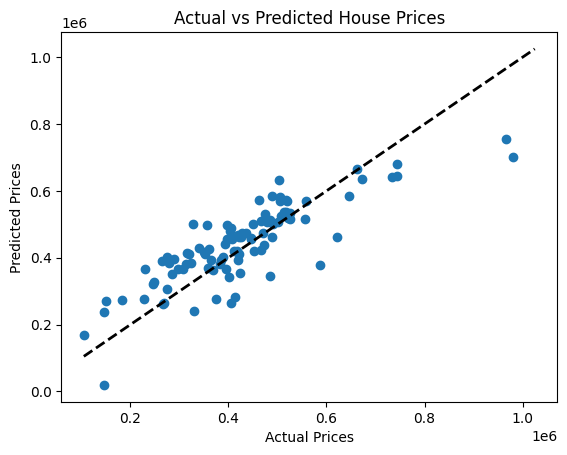

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

In [ ]:
import pickle

# Save both the model and the scaler
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump({"model": model, "scaler": scaler}, file)

In [ ]:
# Predict house price for custom input
# Example input values (replace with your own)
custom_input = {"RM": 6.5, "LSTAT": 12.0, "PTRATIO": 18.0}

# Convert to DataFrame for consistency
import numpy as np
input_features = np.array([[custom_input["RM"], custom_input["LSTAT"], custom_input["PTRATIO"]]])
input_scaled = scaler.transform(input_features)
predicted_price = model.predict(input_scaled)[0]
print(f"Predicted house price: {predicted_price:.2f}k")